# Actividad 2_9: 

Vamos a hacer un trabajo en grupos. Dividiros en grupos de 2 o 3 personas (organizaros el trabajo para que se pueda hacer en paralelo). Debéis responder a la siguiente pregunta. ¿Existe relación entre la emisión de CO2 que tienen los países y su esperanza de vida? Para ello os sugiero lo siguiente:


1. Podéis buscar los datasets necesarios en el portal Kaggle.
2. Una vez encontrados hay que importar los datos y tratarlos con el objetivo de solucionar la pregunta realizada.
3. Puedes normalizar, pintar gráficas, buscar índices calculados en base a los datos, etc.
4. También puedes utilizar la matriz de correlación. La veremos con detalle más adelante, pero aquí tienes como usarla en Pandas: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

             Life exp  CO2 consump
Life exp     1.000000     0.454692
CO2 consump  0.454692     1.000000


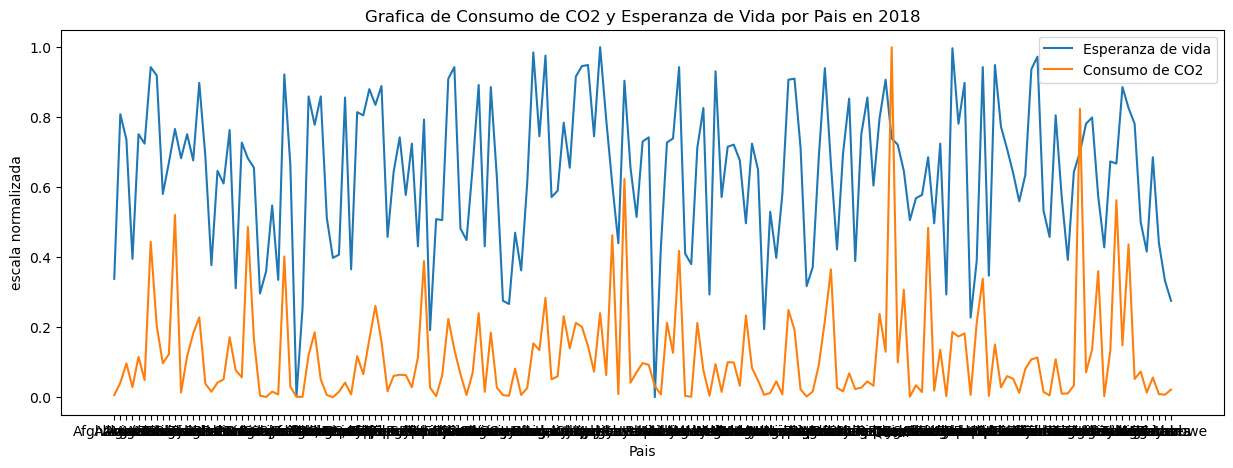

In [ ]:
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

fit_transformer = MinMaxScaler()
fig, ax = plt.subplots(figsize=(15,5))

df_graphs = pd.read_csv("gapminder_data_graphs.csv")
countryList = []
life_exp = []
co2 = []
year = []

df_graphs_filtered = df_graphs.loc[(df_graphs["year"] == 2018)]
df_graphs_filtered.head(100)

countryList = df_graphs_filtered["country"].to_list()
life_exp = df_graphs_filtered["life_exp"].to_list()
co2 = df_graphs_filtered["co2_consump"].to_list()
year = df_graphs_filtered["year"].to_list()

df_filtered = pd.DataFrame( {
    "Country" : countryList,
    "Life exp" : life_exp,
    "CO2 consump" : co2,
    "Year" : year
    })

df_filtered[["Life exp", "CO2 consump"]] = (fit_transformer.
                           fit_transform(df_filtered[["Life exp", "CO2 consump"]]))

print(df_filtered.drop(columns=["Year"]).corr(method='pearson', numeric_only=True))


plt.plot( df_filtered['Country'], df_filtered['Life exp'])
plt.plot( df_filtered['Country'], df_filtered['CO2 consump'])
ax.set_title("Grafica de Consumo de CO2 y Esperanza de Vida por Pais en 2018")
ax.set_xlabel("Pais")
ax.set_ylabel("escala normalizada")
plt.legend(['Esperanza de vida', 'Consumo de CO2'])

plt.show()



